# Data Analysis with Pandas

In [1]:
import pandas as pd

In [2]:
data = {
    'name': ['ju', 'ma', 'lo', 'fi', 'na', 'pe'],
    'age': [25, 36, 40, 18, 25, 40],
    'group': [1, 1, 2, 3, 3, 3],
    'country': ['fr', 'gb', 'gb', 'fr', 'es', 'it'],
    'patrimony': [3000, 7000, 2000, 60000, 8000000, 4000],

}
df = pd.DataFrame(data)

In [3]:
df

,name,age,group,country,patrimony
0,ju,25,1,fr,3000
1,ma,36,1,gb,7000
2,lo,40,2,gb,2000
3,fi,18,3,fr,60000
4,na,25,3,es,8000000
5,pe,40,3,it,4000


## Centrality Measures

### Mean (average)

In [4]:
mean_age = df['age'].mean()
int(mean_age)

30

In [5]:
mean_patrimony = df['patrimony'].mean()
int(mean_patrimony)

1346000

### Median

In [6]:
median_age = df['age'].median()
int(median_age)

30

In [7]:
median_patrimony = df['patrimony'].median()
int(median_patrimony)

5500

## Dispersion Measures

### Standard deviation 

In [8]:
std_age = df['age'].std()
int(std_age)

9

In [9]:
std_patrimony = df['patrimony'].std()
int(std_patrimony)

3259858

### Inter-quartile range (IQR)

In [10]:
data_temp = {
    'name': ['ma', 'lo', 'fi', 'na', 'pe'],
    'age': [36, 40, 18, 25, 40],
    'patrimony': [7000, 2000, 5000, 8000000, 4000],
}
df_temp = pd.DataFrame(data_temp)

In [11]:
df_temp

,name,age,patrimony
0,ma,36,7000
1,lo,40,2000
2,fi,18,5000
3,na,25,8000000
4,pe,40,4000


In [12]:
iqr_age = df_temp['age'].quantile(.75) \
        - df_temp['age'].quantile(.25)
int(iqr_age)

15

In [13]:
iqr_patrimony = df_temp['patrimony'].quantile(.75) \
                - df_temp['patrimony'].quantile(.25)
int(iqr_patrimony)

3000

In [14]:
# What is a quantile, example:
# These are exact values when 25% and 75% points exist
# Otherwise, linear interpolation
print(int(df_temp['patrimony'].quantile(.25)))
print(int(df_temp['patrimony'].quantile(.75)))

4000
7000


### Min Max

In [15]:
min_max_age = df['age'].max() - df['age'].min()
min_max_age

22

In [16]:
min_max_patrimony = df['patrimony'].max() \
                  - df['patrimony'].min()
min_max_patrimony

7998000

## Univariate Analysis (patterns)

### Time Series

In [17]:
data_time = {
    'date': [
        '2021-01-01',
        '2021-02-01',
        '2021-03-01',
        '2021-04-01',
        '2021-05-01',
        '2021-06-01',
        '2021-07-01',
        '2021-08-01',
        '2021-09-01',
        '2021-10-01',
        '2021-11-01',
        '2021-12-01',
        '2022-01-01',
        '2022-02-01',
        '2022-03-01',
        '2022-04-01',
        '2022-05-01',
        '2022-06-01',
        '2022-07-01',
        '2022-08-01',
        '2022-09-01',
        '2022-10-01',
        '2022-11-01',
        '2022-12-01',
    ],
    'revenue': [
        12000,
        13000,
        13000,
        13000,
        18000,
        19000,
        21000,
        23000,
        18000,
        13000,
        13000,
        13000,
        12000,
        13000,
        13000,
        13000,
        18000,
        19000,
        21000,
        23000,
        20000,
        20000,
        21000,
        20000,
    ]
}
df_time = pd.DataFrame(data_time)

In [18]:
# Cast as 'datetime' type (string otherwise)
df_time.index = pd.to_datetime(df_time['date'])
df_time.drop(columns='date', inplace=True)

In [176]:
df_time

,revenue
date,
2021-01-01,12000
2021-02-01,13000
2021-03-01,13000
2021-04-01,13000
2021-05-01,18000
2021-06-01,19000
2021-07-01,21000
2021-08-01,23000
2021-09-01,18000


#### Trend

##### Variation
To get the trend on the whole period

<AxesSubplot:xlabel='date'>

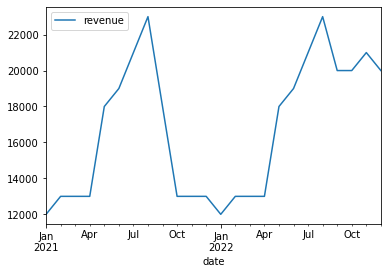

In [177]:
df_time.plot()

In [20]:
revenue_first = df_time['revenue'].iloc[0]
revenue_last = df_time['revenue'].iloc[-1]
n_dates = len(df_time)
(revenue_last - revenue_first) / n_dates

333.3333333333333

There is an upward movement since the variation is positive (+333)

##### Moving Average
- To get the trend on a shorter period
- Also provides a base for seasonality analysis

<AxesSubplot:xlabel='date'>

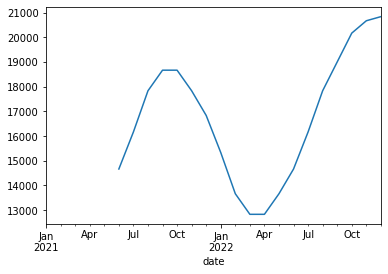

In [21]:
N_MONTHS_PERIOD = 6
rolling_mean = df_time['revenue'].rolling(window=N_MONTHS_PERIOD).mean()
rolling_mean.plot()

- A rolling mean smoothen the time series
- It yields a cleaner overview of the trend along time
- Still provides more information than the overall variation

#### Autocorrelation (ACF)

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

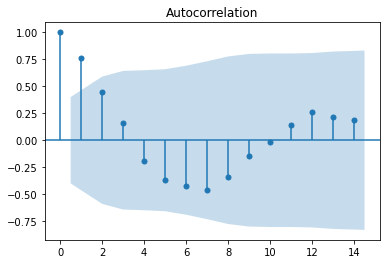

In [23]:
plot_acf(df_time['revenue'])
None

To go further see: PACF (partial autocorrelation function)

### Quantitative variable (other than time series)

In [24]:
data_quantitative = {
    'transaction': [
        'transac_olp',
        'transac_ixh',
        'transac_qkh',
        'transac_qlz',
        'transac_mal',
        'transac_fjh',
        'transac_rdn',
        'transac_oaj',
        'transac_taz',
        'transac_tgs',
    ],
    'price': [
        15,
        17,
        20,
        20,
        19,
        17,
        20,
        20,
        23,
        17,
    ],
}
df_quanti = pd.DataFrame(data_quantitative)

In [25]:
df_quanti

,transaction,price
0,transac_olp,15
1,transac_ixh,17
2,transac_qkh,20
3,transac_qlz,20
4,transac_mal,19
5,transac_fjh,17
6,transac_rdn,20
7,transac_oaj,20
8,transac_taz,23
9,transac_tgs,17


<AxesSubplot:>

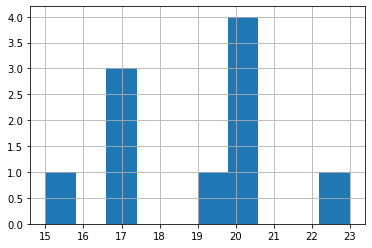

In [26]:
df_quanti['price'].hist()

<AxesSubplot:>

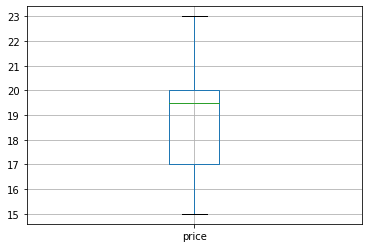

In [27]:
df_quanti[['price']].boxplot()

In [28]:
df_quanti['price'].describe()

count    10.000000
mean     18.800000
std       2.299758
min      15.000000
25%      17.000000
50%      19.500000
75%      20.000000
max      23.000000
Name: price, dtype: float64

### Qualitative variable

In [29]:
data_qualitative = {
    'transaction': [
        'transac_olp',
        'transac_ixh',
        'transac_qkh',
        'transac_qlz',
        'transac_mal',
        'transac_fjh',
        'transac_rdn',
        'transac_oaj',
        'transac_taz',
        'transac_tgs',
    ],
    'client_type': [
        'veggie',
        'veggie',
        'vegan',
        'omnivorous',
        'vegan',
        'veggie',
        'veggie',
        'omnivorous',
        'vegan',
        'veggie',
    ],
}
df_quali = pd.DataFrame(data_qualitative)

In [30]:
df_quali

,transaction,client_type
0,transac_olp,veggie
1,transac_ixh,veggie
2,transac_qkh,vegan
3,transac_qlz,omnivorous
4,transac_mal,vegan
5,transac_fjh,veggie
6,transac_rdn,veggie
7,transac_oaj,omnivorous
8,transac_taz,vegan
9,transac_tgs,veggie


In [31]:
counts = df_quali['client_type'].value_counts()
counts

veggie        5
vegan         3
omnivorous    2
Name: client_type, dtype: int64

<AxesSubplot:>

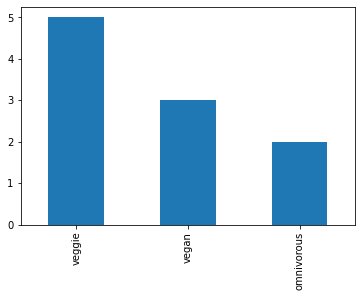

In [32]:
counts.plot.bar()

Be careful with qualitative variables, some have:
- ordinality (small, medium, large)

## Multivariate Analysis

### Quantitative variables

#### Linear Dataset

In [33]:
data_multi_quantitative = {
    'rain': [
        120,
        120,
        80,
        0,
        50,
        100,
        0,
        0,
        0,
        150,
    ],
    'temperature': [
        15,
        17,
        20,
        20,
        19,
        17,
        20,
        20,
        23,
        17,
    ],
}
df_multi_quanti = pd.DataFrame(data_multi_quantitative)

In [34]:
df_multi_quanti

,rain,temperature
0,120,15
1,120,17
2,80,20
3,0,20
4,50,19
5,100,17
6,0,20
7,0,20
8,0,23
9,150,17


<AxesSubplot:xlabel='rain', ylabel='temperature'>

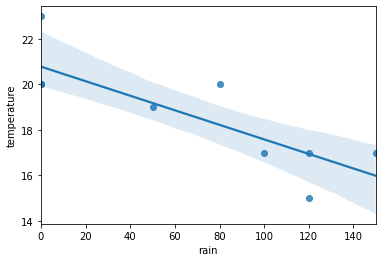

In [40]:
import seaborn as sns
sns.regplot(x='rain', y='temperature', data=df_multi_quanti)

In [ ]:
df_multi_quanti.corr()  # Pearson correlation for linear relations

,rain,temperature
rain,1.000000,-0.826323
temperature,-0.826323,1.000000


- We observe a negative relation between rain and temperature (these data are not real)
- The relation seems linear (could be fit by a linear regression)
- There does not seem to have outliers (values very different from the rest)

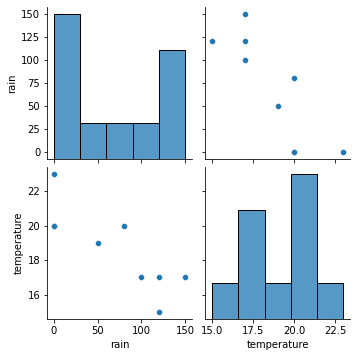

In [42]:
sns.pairplot(df_multi_quanti)

- The temperature distribution might have a hole in the middle due to a lack of data
- If more data were extracted from the phenomenon, the distribution might better fit a bell curve
- It does not seem true for the rain

In [37]:
groups = df_multi_quanti.groupby('rain').mean()
groups

,temperature
rain,
0,20.75
50,19.00
80,20.00
100,17.00
120,16.00
150,17.00


<AxesSubplot:xlabel='rain'>

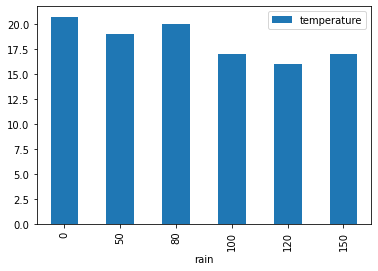

In [38]:
groups.plot.bar()

#### Non-linear Dataset

In [52]:
data_multi_quantitative = {
    'age': [
        17,
        19,
        21,
        45,
        38,
        55,
        19,
        32,
        23,
        23,
    ],
    'salary': [
        600,
        600,
        600,
        2500,
        2500,
        2500,
        800,
        2500,
        850,
        850,
    ],
}
df_multi_quanti_non_linear = pd.DataFrame(data_multi_quantitative)

In [53]:
df_multi_quanti_non_linear

,age,salary
0,17,600
1,19,600
2,21,600
3,45,2500
4,38,2500
5,55,2500
6,19,800
7,32,2500
8,23,850
9,23,850


<AxesSubplot:xlabel='age', ylabel='salary'>

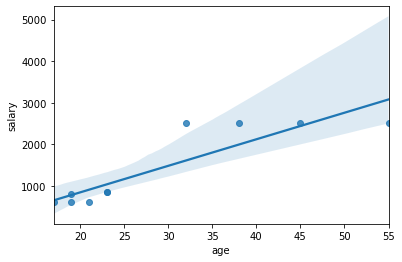

In [54]:
sns.regplot(x='age', y='salary', data=df_multi_quanti_non_linear)

- We observe a position relation between age and salary (these data are not real)
- The relation does NOT seem linear, data goes outside of confidence interval
- There seems to be a threshold age above which the salary raises to 2500
- There does not seem to have outliers (values very different from the rest)

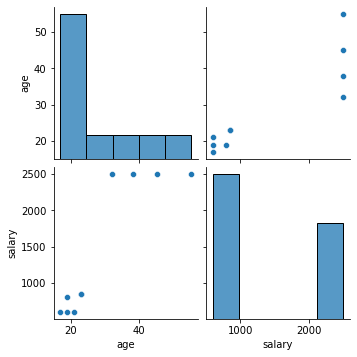

In [59]:
sns.pairplot(df_multi_quanti_non_linear)

- A non-linear model seems more appropriate to analyse the phenomenon
- The salary distribution seems to have 2 modes (below 1000 and at 2500)

In [60]:
df_multi_quanti_non_linear.corr()

,age,salary
age,1.000000,0.891305
salary,0.891305,1.000000


- One should not use the Pearson correlation on such data, it would provide a misleading result
- The result is right concerning the positive relation as the salary increases with age
- However, this is not a linear relation
- The correlation should rather be computed for the 2 separated modes

<AxesSubplot:xlabel='age', ylabel='salary'>

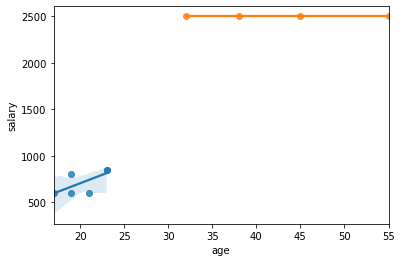

In [61]:
sorted = df_multi_quanti_non_linear.sort_values(by='age')
sns.regplot(x='age', y='salary', data=sorted.iloc[:6])
sns.regplot(x='age', y='salary', data=sorted.iloc[6:])

In [63]:
sorted.iloc[:6].corr()


,age,salary
age,1.000000,0.682242
salary,0.682242,1.000000


In [64]:
sorted.iloc[6:].corr()

,age,salary
age,1.0,NaN
salary,NaN,NaN


- These results are more accurate

In [65]:
from scipy import stats
stats.spearmanr(df_multi_quanti_non_linear)

SpearmanrResult(correlation=0.9209224503231543, pvalue=0.0001553715621233412)

- To still obtain a result on the whole dataset, use the spearman correlation since it is based on ranks rather than a linear coefficient
- The result indicates a strong positive correlation between age and salary (we naturally see it from the graph)
- Since pvalue < 0.05 we can trust this result (more about this later)

### Qualitative variables

In [121]:
# Let's imagine a company transactions of its sweat shirts of different sizes sent to multiple French cities
data_multi_qualitative = {
    'city': [
        'paris',
        'marseille',
        'lyon',
        'marseille',
        'paris',
        'marseille',
        'bordeaux',
        'montpellier',
        'paris',
        'paris',
    ],
    'sweat_size': [
        'M',
        'S',
        'M',
        'S',
        'M',
        'S',
        'XS',
        'M',
        'M',
        'M',
    ],
}
df_multi_quali = pd.DataFrame(data_multi_qualitative)

In [122]:
df_multi_quali

,city,sweat_size
0,paris,M
1,marseille,S
2,lyon,M
3,marseille,S
4,paris,M
5,marseille,S
6,bordeaux,XS
7,montpellier,M
8,paris,M
9,paris,M


In [123]:
# Counts are useful to obtain a quantitative variable
df_multi_quali.value_counts()

city         sweat_size
paris        M             4
marseille    S             3
bordeaux     XS            1
lyon         M             1
montpellier  M             1
dtype: int64

<AxesSubplot:ylabel='None'>

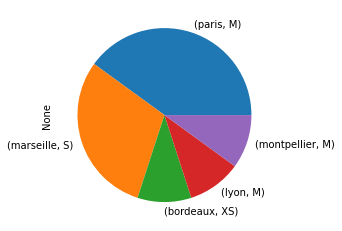

In [124]:
df_multi_quali.value_counts().plot.pie()

In [125]:
df_multi_quali.groupby('city').count()

,sweat_size
city,
bordeaux,1
lyon,1
marseille,3
montpellier,1
paris,4


<AxesSubplot:ylabel='sweat_size'>

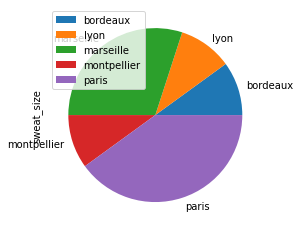

In [126]:
df_multi_quali.groupby('city').count().plot.pie(y='sweat_size')

In [127]:
df_multi_quali.groupby('sweat_size').count()

,city
sweat_size,
M,6
S,3
XS,1


<AxesSubplot:ylabel='city'>

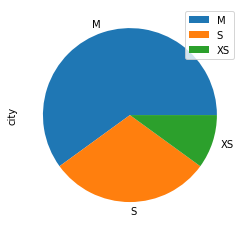

In [128]:
df_multi_quali.groupby('sweat_size').count().plot.pie(y='city')

In [129]:
# test correlation: is there a link between the sweat size and the city?
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df_multi_quali['city'], df_multi_quali['sweat_size'])
crosstab

sweat_size,M,S,XS
city,,,
bordeaux,0,0,1
lyon,1,0,0
marseille,0,3,0
montpellier,1,0,0
paris,4,0,0


In [130]:
results = chi2_contingency(crosstab)
print('pvalue', results[1])

pvalue 0.010336050675925726


- Since p_value < 0.05 the variables are correlated
- More formally: we reject the null hypothesis (H0: variables are independant)

### Quantitative with qualitative variable

In [174]:
data_multi_quanti_quali = {
    'age_company_months': [
        513,
        100,
        90,
        300,
        12,
        20,
        500,
        40,
        1,
        250,
    ],
    'default': [
        1,
        1,
        1,
        0,
        1,
        1,
        0,
        1,
        1,
        0,
    ],
}
df_multi_quanti_quali = pd.DataFrame(data_multi_quanti_quali)

In [163]:
df_multi_quanti_quali

,age_company_months,default
0,13,1
1,100,1
2,90,1
3,300,0
4,12,1
5,20,1
6,500,0
7,40,1
8,1,1
9,250,0


<AxesSubplot:xlabel='default', ylabel='age_company_months'>

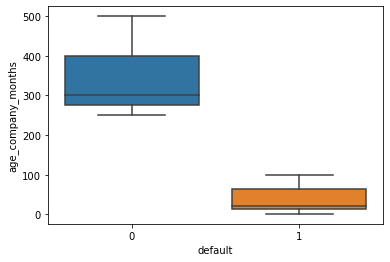

In [164]:
sns.boxplot(x='default', y='age_company_months', data=df_multi_quanti_quali)

- We observe a large difference between yound and old companies (data not real)
- Young companies defaulted as opposed to old companies
- Be careful as these type of data (default) are prone to the "survivor bias"

In [175]:
# Verify this correlation using ANOVA test
from statsmodels.formula.api import ols
from statsmodels.api import stats
model = ols('default ~ age_company_months', data=df_multi_quanti_quali).fit()
anova_table = stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
age_company_months,1.0,0.715502,0.715502,4.134365,0.076463
Residual,8.0,1.384498,0.173062,NaN,NaN


- Since p-value < 0.05 (PR(>F)), age_company_months is correlated with default
- More formally: we reject the null hypothesis (H0: variables are independant)